In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from helpers import env_var

In [19]:
h5_stores = {}
for exp_name in ("GradCAM", "KPCACAM"):
    h5_stores[exp_name] = pd.HDFStore(f"{env_var.get_project_root()}/results/{exp_name}/demo_output.h5", mode="r")

In [21]:
h5_stores["KPCACAM"].keys()

['/EuroSATRGB_ResNet50']

In [22]:
gradcam_df = h5_stores["GradCAM"]["EuroSATRGB_ResNet50"]
kpcacam_df = h5_stores["KPCACAM"]["EuroSATRGB_ResNet50"]

In [23]:
for h5_store in h5_stores.values():
    h5_store.close()

In [25]:
gradcam_df.head()

,correctness : randomised_model_similarity : l2_distance,correctness : randomised_model_similarity : spearman_rank,correctness : randomised_model_similarity : top_m_intersection,correctness : randomised_model_similarity : structural_similarity,correctness : incremental_deletion_auc_ratio,output_completeness : deletion_check_conf_drop,output_completeness : preservation_check_conf_drop,continuity : perturbation_similarity : l2_distance,continuity : perturbation_similarity : spearman_rank,continuity : perturbation_similarity : top_m_intersection,continuity : perturbation_similarity : structural_similarity,contrastivity : adversarial_attack_similarity : l2_distance,contrastivity : adversarial_attack_similarity : spearman_rank,contrastivity : adversarial_attack_similarity : top_m_intersection,contrastivity : adversarial_attack_similarity : structural_similarity,compactness : threshold_score
AnnualCrop,0.001454,0.072466,0.139644,0.392066,3.494688,-0.328867,0.863973,0.001127,0.425761,0.259498,0.585815,0.001276,0.320471,0.172520,0.546035,0.612716
Forest,0.002005,0.310636,0.115345,0.380830,1.009463,-0.005698,0.024647,0.001061,0.502854,0.245822,0.583541,0.001496,-0.069013,0.133259,0.418092,0.599297
HerbaceousVegetation,0.002310,-0.193311,0.056302,0.308168,0.724946,0.144911,-0.011231,-inf,-inf,-inf,-inf,0.001416,0.092382,0.153746,0.447846,0.475729
Highway,0.001820,-0.104868,0.008154,0.343070,0.835786,0.184397,0.480875,0.000542,0.904549,0.686506,0.810526,0.001715,-0.042316,0.144527,0.421637,0.775301
Industrial,0.002165,-0.151644,0.055057,0.313127,1.341702,-0.170490,-0.023490,0.000989,0.685037,0.404846,0.677213,0.001422,0.108950,0.105361,0.450473,0.539121


In [26]:
kpcacam_df.head()

,correctness : randomised_model_similarity : l2_distance,correctness : randomised_model_similarity : spearman_rank,correctness : randomised_model_similarity : top_m_intersection,correctness : randomised_model_similarity : structural_similarity,correctness : incremental_deletion_auc_ratio,output_completeness : deletion_check_conf_drop,output_completeness : preservation_check_conf_drop,continuity : perturbation_similarity : l2_distance,continuity : perturbation_similarity : spearman_rank,continuity : perturbation_similarity : top_m_intersection,continuity : perturbation_similarity : structural_similarity,contrastivity : adversarial_attack_similarity : l2_distance,contrastivity : adversarial_attack_similarity : spearman_rank,contrastivity : adversarial_attack_similarity : top_m_intersection,contrastivity : adversarial_attack_similarity : structural_similarity,compactness : threshold_score
AnnualCrop,0.001633,0.145074,0.136013,0.356962,3.335265,-0.349219,0.848125,0.000852,0.692486,0.495575,0.575728,0.000781,0.639597,0.542400,0.586667,0.829229
Forest,0.001900,-0.076706,0.025949,0.339164,1.010828,-0.006629,-0.010033,0.001078,0.357993,0.478740,0.454589,0.000596,0.721117,0.709693,0.624690,0.863720
HerbaceousVegetation,0.001552,0.045544,0.190160,0.364348,0.899807,0.090668,0.032038,-inf,-inf,-inf,-inf,0.000802,0.603886,0.558140,0.602162,0.822363
Highway,0.001628,-0.001770,0.067508,0.329613,0.981087,0.092112,0.395898,0.000584,0.879288,0.602771,0.696570,0.000559,0.750306,0.664161,0.687182,0.829764
Industrial,0.001351,0.259924,0.207663,0.367439,1.878319,-0.356507,-0.004003,0.000847,0.626264,0.532113,0.564374,0.000590,0.744973,0.681639,0.675871,0.818762


xai_method
gradcam    Axes(0.125,0.11;0.775x0.77)
kpcacam    Axes(0.125,0.11;0.775x0.77)
dtype: object

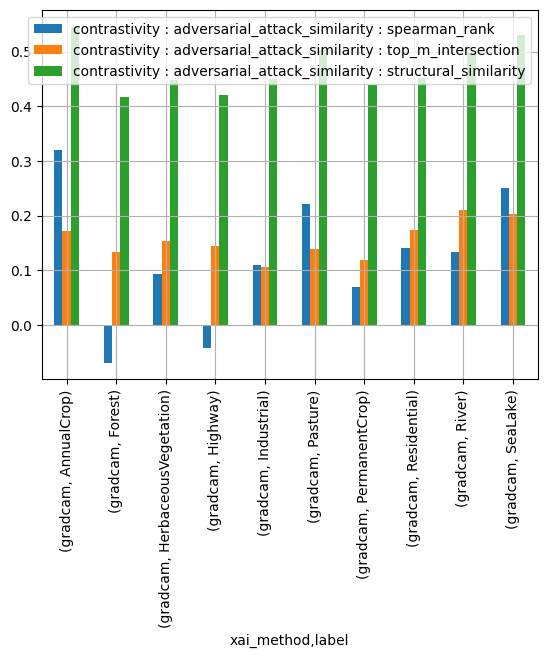

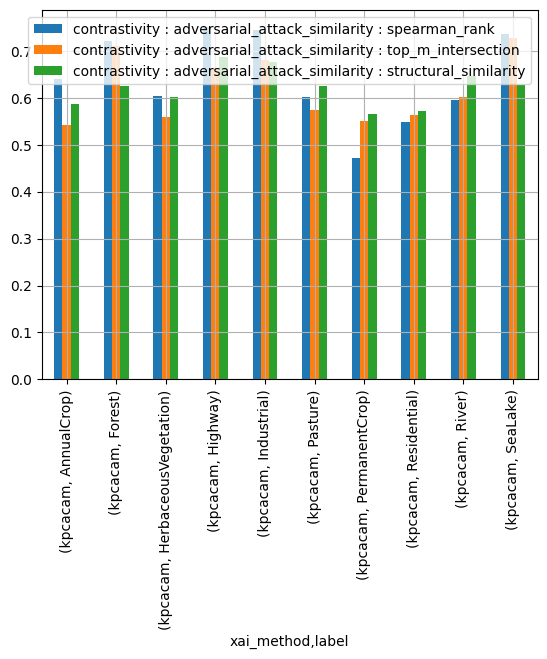

In [72]:
contrastivity_cols = gradcam_df.columns[gradcam_df.columns.str.startswith("contrastivity")][1:]

pd.concat([gradcam_df[contrastivity_cols], kpcacam_df[contrastivity_cols]], keys=["gradcam", "kpcacam"], names=["xai_method", "label"]).groupby("xai_method").plot(kind="bar", subplots=False, grid=True)